In [1]:
###IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Install and Read dataframe 

### NOTE: either replace all backslashes \ with frontslashes / or place a r before your filepath string to avoid an error.
### The reason why the code works now is that I places a r in front of 'C. This tells python not to process the backslash character / as it usually does and read the whole string as-is.

In [2]:
df = pd.read_csv(r'C:\Users\sbarros\OneDrive - Healthfirst\Documents\NYPD_Arrest_Data__Year_to_Date__20240501.csv')

In [4]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,1/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,1/2/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,1/3/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,1/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,1/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [5]:
# another way to check the lenth is using this code len(df)
df.shape 

(63621, 19)

In [6]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [7]:
# or it can be used df.dtypes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

## Decided to make a new dataframe copy so I can preserve the original df Dataframe

### Dropped the columns that I don't need to use for the analysis.

In [8]:
df_update= df.copy()
df_update.drop(['X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column', 'PD_CD', 'KY_CD', 'LAW_CODE', 'JURISDICTION_CODE', 'ARREST_PRECINCT'], axis=1, inplace=True)

In [13]:
#Displayed 9 columns instead of 19.
df_update.shape

(63621, 9)

In [12]:
#original df dataframe with 19 columns
df.columns
df.shape

(63621, 19)

In [14]:
df_update.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,280255493,1/10/2024,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,F,M,<18,M,BLACK
1,279805419,1/2/2024,RAPE 1,RAPE,F,K,25-44,M,WHITE HISPANIC
2,279895750,1/3/2024,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,Q,65+,F,WHITE
3,280809090,1/19/2024,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,M,B,45-64,M,BLACK
4,280357135,1/11/2024,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,F,K,25-44,F,BLACK


## Decided to marked the headings of the columns as lower case.

In [15]:
df_update.columns = [col.lower() for col in df_update.columns]

In [17]:
df_update.columns

Index(['arrest_key', 'arrest_date', 'pd_desc', 'ofns_desc', 'law_cat_cd',
       'arrest_boro', 'age_group', 'perp_sex', 'perp_race'],
      dtype='object')

## Searched for nul values in the dataframe.

In [18]:
#Law_cat_cd column has 402 blank/null values.
df_update.isna().sum()

arrest_key       0
arrest_date      0
pd_desc          0
ofns_desc        0
law_cat_cd     402
arrest_boro      0
age_group        0
perp_sex         0
perp_race        0
dtype: int64

## Pulled the null values in the particular columns 'law_cat_cd'.

In [19]:
#To see the Null values represented as NaN
df_update[df_update['law_cat_cd'].isna()].head()

,arrest_key,arrest_date,pd_desc,ofns_desc,law_cat_cd,arrest_boro,age_group,perp_sex,perp_race
208,279912472,1/3/2024,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,NaN,M,25-44,M,BLACK HISPANIC
301,281740740,2/6/2024,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,NaN,M,45-64,F,BLACK
482,281474362,2/1/2024,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,NaN,Q,25-44,M,BLACK
504,280281682,1/10/2024,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,NaN,B,45-64,M,BLACK
594,281409918,1/31/2024,U.S. CODE UNCLASSIFIED,FOR OTHER AUTHORITIES,NaN,M,25-44,M,WHITE HISPANIC


## Dropped the null values

In [20]:
df_update=df_update.dropna()

In [21]:
#to verify if the null values were dropped.
df_update.isna().sum()

arrest_key     0
arrest_date    0
pd_desc        0
ofns_desc      0
law_cat_cd     0
arrest_boro    0
age_group      0
perp_sex       0
perp_race      0
dtype: int64

In [24]:
df_update.dtypes

arrest_key      int64
arrest_date    object
pd_desc        object
ofns_desc      object
law_cat_cd     object
arrest_boro    object
age_group      object
perp_sex       object
perp_race      object
dtype: object

## Updated the datatype for arrest_date from object

In [26]:
df_update['arrest_date'] = pd.to_datetime(df_update['arrest_date'], format='%m/%d/%Y')

In [32]:
# Added the headings 'Columns' and Datatype
pd.DataFrame(df_update.dtypes,columns=['Datatype']).rename_axis('Columns')

,Datatype
Columns,
arrest_key,int64
arrest_date,datetime64[ns]
pd_desc,object
ofns_desc,object
law_cat_cd,object
arrest_boro,object
age_group,object
perp_sex,object
perp_race,object


### definition F= felony, M=misdemeanor, V=violation

### '9' seems mistyping values, I considered it 'misdemeanor' 
### "Felony" means an offense for which a sentence to a term of imprisonment in excess of one year may be imposed.
### "Misdemeanor" means an offense, other than a "traffic infraction," for which a sentence to a term of imprisonment in excess of fifteen days may be imposed, but for which a sentence to a term of imprisonment in excess of one year cannot be imposed.
### "Violation" means an offense, other than a "traffic infraction," for which a sentence to a term of imprisonment in excess of fifteen days cannot be imposed.
### "Traffic Infraction" means any offense defined as "traffic infraction" by section one hundred fifty-five of the vehicle and traffic law.

In [98]:
df_update['law_cat_cd'].unique()

array(['Felony', 'Misdemeanor', nan, 'Violation', 'Traffic Infraction'],
      dtype=object)

## value counts for law_cat_cd

In [35]:
df_update['law_cat_cd'].value_counts()

law_cat_cd
M         35580
F         26653
V           775
9           155
I            54
(null)        2
Name: count, dtype: int64

## Gave a definition to each category 

In [36]:
df_update['law_cat_cd']=df_update['law_cat_cd'].map({'F': 'Felony', 'M': 'Misdemeanor','V': 'Violation', 'I': 'Traffic Infraction', '9': 'Misdemeanor'})

In [37]:
df_update['law_cat_cd'].value_counts()

law_cat_cd
Misdemeanor           35735
Felony                26653
Violation               775
Traffic Infraction       54
Name: count, dtype: int64

## Borough unique values

In [38]:
df_update['arrest_boro'].unique()

array(['M', 'K', 'Q', 'B', 'S'], dtype=object)

In [39]:
df_update['arrest_boro'].value_counts()

arrest_boro
K    17338
M    15152
B    14125
Q    13727
S     2877
Name: count, dtype: int64

## Gave a definition to each borough

In [41]:
df_update['arrest_boro']=df_update['arrest_boro'].map({'B': 'Bronx', 'S': 'Staten Island','K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens'})

In [42]:
df_update['arrest_boro'].value_counts()

arrest_boro
Brooklyn         17338
Manhattan        15152
Bronx            14125
Queens           13727
Staten Island     2877
Name: count, dtype: int64

## Perp_sex unique values

In [43]:
df_update['perp_sex'].unique()

array(['M', 'F'], dtype=object)

In [44]:
df_update['perp_sex']=df_update['perp_sex'].map({'M': 'Male', 'F': 'Female'})

In [45]:
df_update['perp_sex']

0          Male
1          Male
2        Female
3          Male
4        Female
          ...  
63616      Male
63617      Male
63618      Male
63619    Female
63620      Male
Name: perp_sex, Length: 63219, dtype: object

In [46]:
df_update['perp_race'].unique()

array(['BLACK', 'WHITE HISPANIC', 'WHITE', 'ASIAN / PACIFIC ISLANDER',
       'UNKNOWN', 'BLACK HISPANIC', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

## total count for Unknown under the prep_race column

In [49]:
df_update['perp_race'].value_counts()

perp_race
BLACK                             29322
WHITE HISPANIC                    17077
WHITE                              6566
BLACK HISPANIC                     6274
ASIAN / PACIFIC ISLANDER           3507
UNKNOWN                             289
AMERICAN INDIAN/ALASKAN NATIVE      184
Name: count, dtype: int64

## Decided to moved the counts for Unknown to Black category

In [50]:
df_update['perp_race']=df_update['perp_race'].replace({'UNKNOWN': 'BLACK'})

In [51]:
df_update['perp_race'].value_counts()

perp_race
BLACK                             29611
WHITE HISPANIC                    17077
WHITE                              6566
BLACK HISPANIC                     6274
ASIAN / PACIFIC ISLANDER           3507
AMERICAN INDIAN/ALASKAN NATIVE      184
Name: count, dtype: int64

## Age_group count

In [52]:
df_update['age_group'].value_counts()

age_group
25-44    36977
45-64    12248
18-24    10631
<18       2327
65+       1036
Name: count, dtype: int64

# Data Analysis and Visualization 

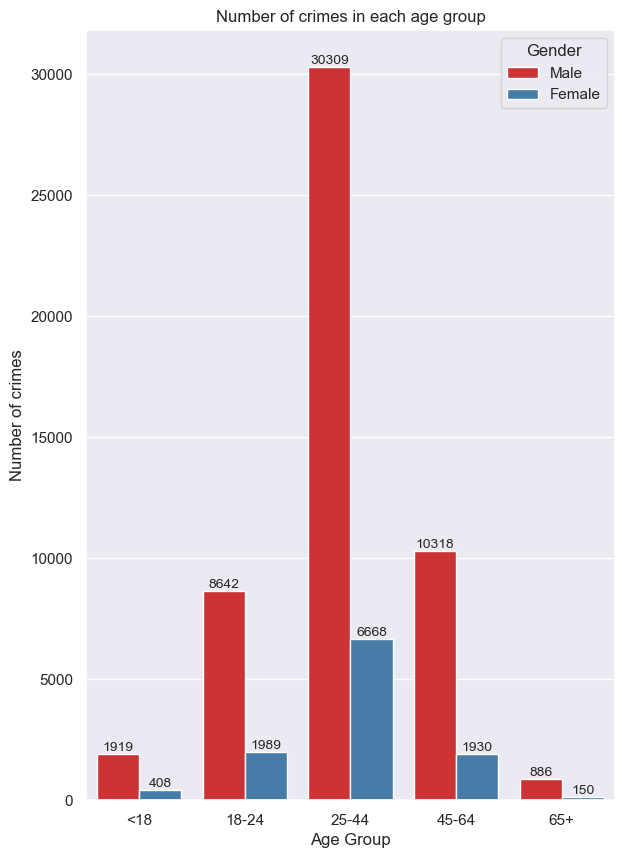

In [57]:
sns.set()

age_order = ['<18','18-24','25-44','45-64','65+']
age_group_count = df_update[['age_group','perp_sex']].copy()

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
hue_type = df_update['perp_sex'].dtype.type
groups = df_update['age_group'].unique()
proportions = df_update.groupby('age_group')['perp_sex'].value_counts(normalize=True)

ax =sns.countplot(data=age_group_count,x='age_group', hue='perp_sex', palette='Set1', order=age_order)
for c in ax.containers:
    labels=[f'{int(v)}' for v in c.datavalues]
    ax.bar_label(c, labels, label_type='edge', fontsize=10)
plt.title ('Number of crimes in each age group')
plt.xlabel('Age Group')
plt.ylabel('Number of crimes')
plt.legend(title='Gender')

### The visualization bar shows that age group and gener that has the most number of crime is:

* Age Group: 25-44
* Gender: Male 
* All other groups are too far from the above.
    * 25-44 with 36977 crimes
    * 45-64 with 12248 crimes
    * 18-24 with 10631 crimes
    * <18 with 2327 crimes
    * 65+ with 1036 crimes

### What are the offenses that are broken in most cases YTD (1st quater)? 

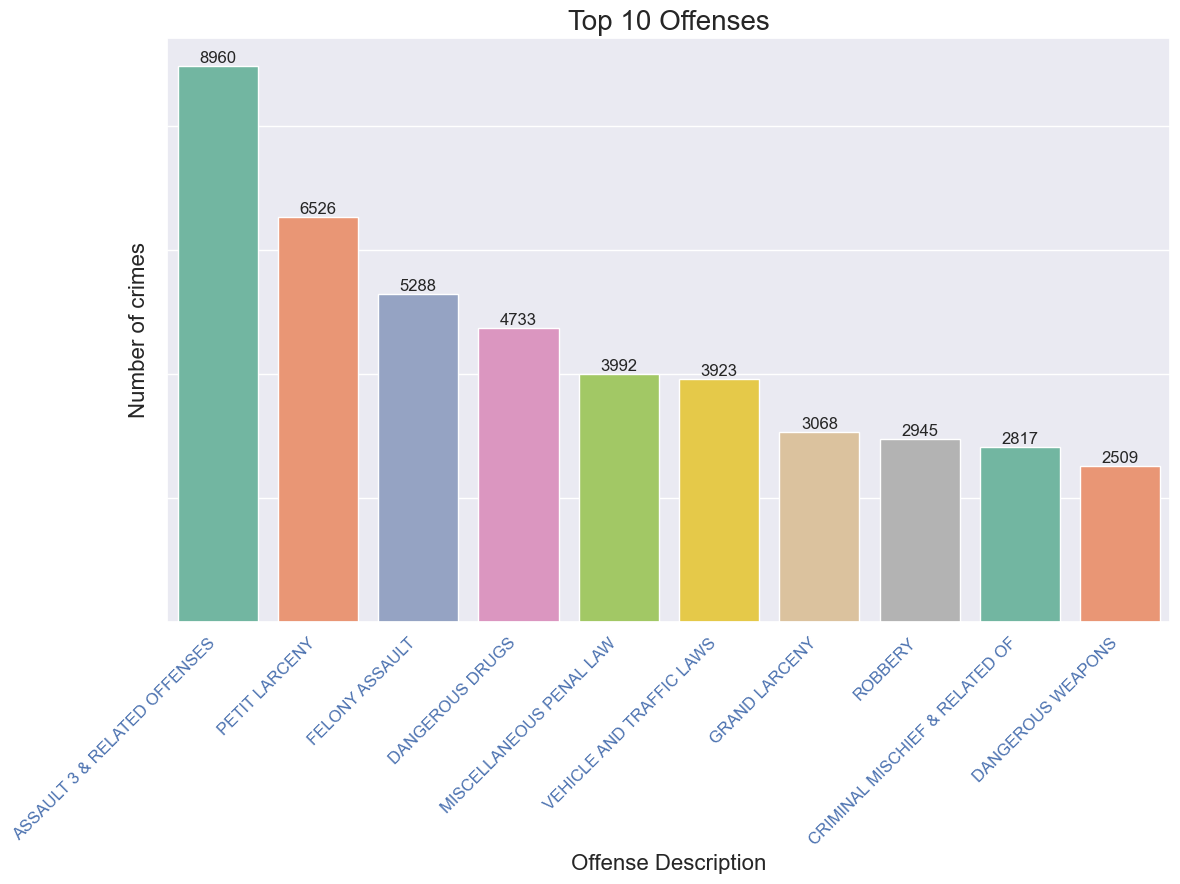

In [74]:
class_order = df_update['ofns_desc'].value_counts().index[:10]

top_10_ofns_desc=df_update[df_update['ofns_desc'].isin(class_order)].copy()

plt.figure(figsize=(12,9))
ax = sns.countplot(data=top_10_ofns_desc, x='ofns_desc', palette='Set2', order=class_order)

for c in ax.containers:
    ax.bar_label(c)

ax.set(yticklabels=[])
plt.title('Top 10 Offenses', fontsize=20)
plt.xticks(rotation=45,fontsize=12, ha='right', color='b')
plt.xlabel('Offense Description', fontsize=16)
plt.ylabel('Number of crimes', fontsize=16)

plt.tight_layout()
plt.show()

* Analysis shows from above:
* ASSAULT 3 & RELATED OFFENCES is the most common crime in this period (Jan thru March 2024).
    * Starting at #5 MISCELLANEOUS PENAL LAW with 3992 count in this top 10 in descending order.

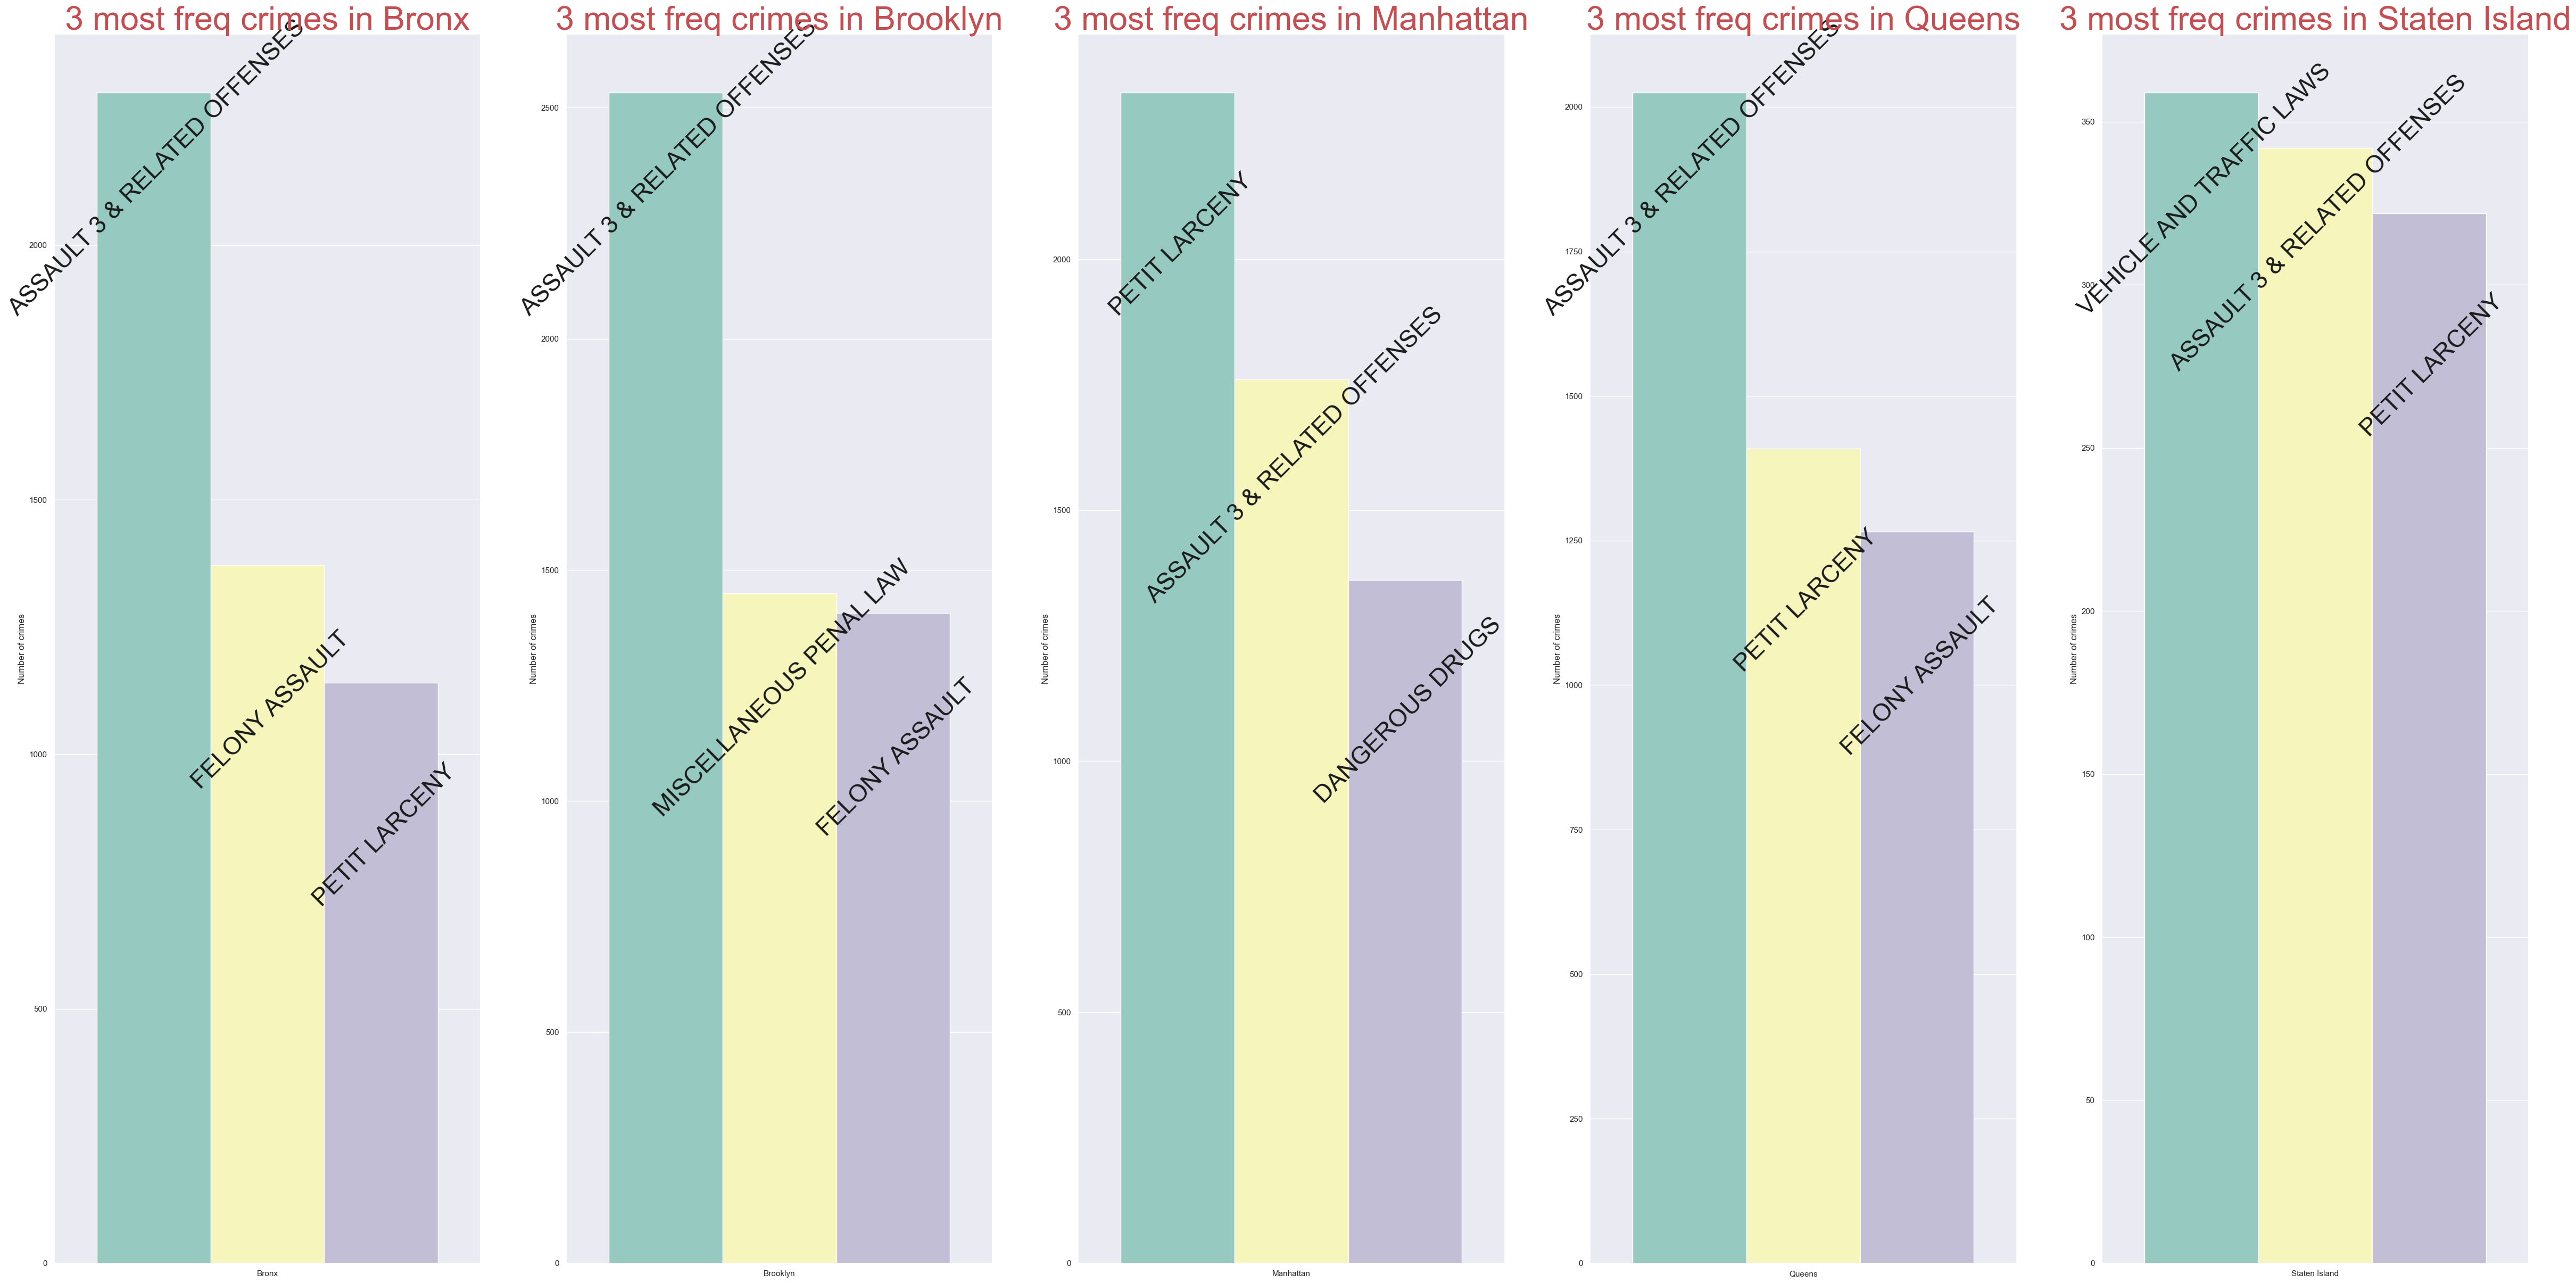

In [82]:
boro_crimes = df_update[['arrest_boro','ofns_desc', 'arrest_key']].copy()
boro_crimes = boro_crimes.groupby(['arrest_boro','ofns_desc'])['arrest_key'].count().reset_index().sort_values(by='arrest_key', ascending=False)

boro_crimes = boro_crimes.groupby('arrest_boro').head(3).sort_values(by='arrest_boro')

boroughs = boro_crimes['arrest_boro'].unique()

fig, axs = plt.subplots(1, boro_crimes.arrest_boro.nunique(), figsize=(60,30))

for i, ax in enumerate(axs.ravel()):
    temp_data = boro_crimes[boro_crimes['arrest_boro'] == boroughs[i]]
    axx = sns.barplot(data=temp_data, x='arrest_boro', y='arrest_key', hue='ofns_desc', ax=ax, palette='Set3')
    for j, p in enumerate(axx.patches):
        axx.annotate(temp_data['ofns_desc'].to_list()[j], 
                      (p.get_x() + p.get_width() / 2., p.get_height()-temp_data['arrest_key'].max()*0.2), 
                      ha = 'center', va = 'baseline', 
                      xytext = (5, 15), 
                      textcoords = 'offset points',
                      fontsize=33,
                      color='k',
                      rotation=45)
    ax.set_title(f'3 most freq crimes in {boroughs[i]}', fontsize=45, color='r')
    ax.set_xlabel('')
    ax.set_ylabel('Number of crimes')
    ax.get_legend().remove()
       
    # ax.legend(title='Offence description', fontsize=15)

* Analysis shows that,
* In the most regions, the most frequent crimes is ASSAULT 3 & RELATED OFFENSES, except Manhattan, there is PETIT LARCENY at the first place and VEHICLE AND TRAFFIC LAWS in State Island at the fisrt place as well foloowing ASSAULT 3 & RELATED OFFENSES.
 * It means Bronx, Brooklyn and Queens are very dangerous boroughs 

### What is the most frequent crime in Q1 2024?

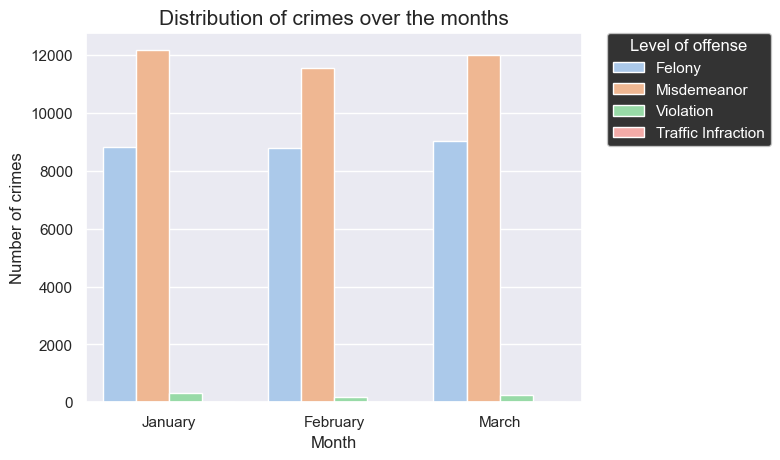

In [86]:
trends_data = df_update.copy()

trends_data['month'] = trends_data['arrest_date'].dt.month_name()
sns.countplot(data=trends_data, x='month', hue='law_cat_cd', palette='pastel')
plt.title('Distribution of crimes over the months', fontsize=15)
plt.xlabel('Month')
plt.ylabel('Number of crimes')

legend = plt.legend(title='Level of offense', labelcolor = 'white', facecolor = 'black', loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.setp(legend.get_title(), color='white')

#plt.tight_layout()
plt.show()


* The analysis shows that the most frequent crime all over the months of Q1 2024 is Misdemeanor and Felony.
* Violation and Traffic Infraction are the most rare.
 

### What days are a higher number of crimes reported and by race? 

In [95]:
trends_data['day'] = trends_data['arrest_date'].dt.strftime('%a')

[None, None]

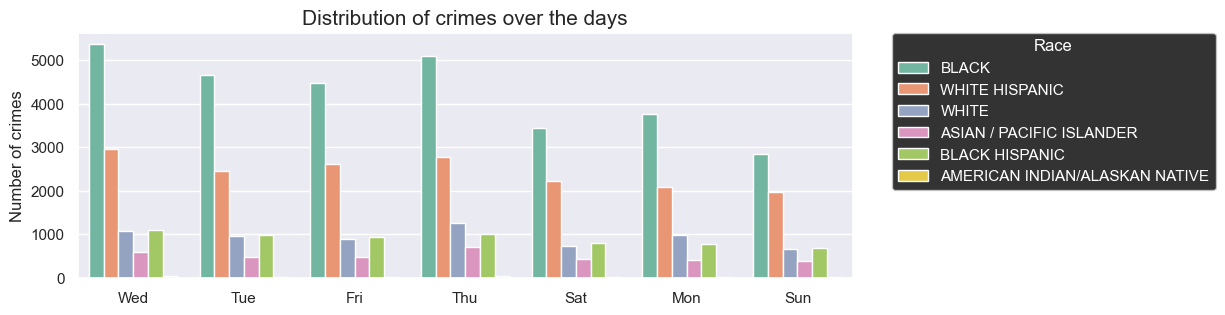

In [97]:
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)

sns.countplot(data=trends_data, x='day', hue='perp_race', palette='Set2')

plt.title('Distribution of crimes over the days', fontsize=15)
plt.xlabel('')
plt.ylabel('Number of crimes')

legend = plt.legend(title='Race', labelcolor = 'white', facecolor = 'black', loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.setp(legend.get_title(), color='white')


* The most number of crimes was made at Wednesday, following by Thursday and Tuesday. The closer you get to the center of the week, the more crime thereis.
* Crimes were made by Black, follow by White Hispanic and the least American Indian Alaskan Native.

### Conclusion for NYPD Arrest Data YTD only Q12024

* 1.- The top age group of crimes are as below:
>     25-44 with 36977 crimes
      45-64 with 12248 crimes
      18-24 with 10631 crimes
      <18 with 2327 crimes
      65+ with 1036 crimes
* 2.- The top 10 Offense violations are:
>     ASSAULT 3 & RELATED OFFENCES with 8960 counts
      PETIT LARCENY with 6526
      FELONY ASSAULT with 5288
      DANGEROUS DRUGS with 4733
      MISCELLANEOUS PENAL LAW with 3992
      VEHICLE AND TRAFFIC LAWS with 3923
      GRAND LARCENY with 3058
      ROBBERY with 2945
      CRIMINAL MISCHIEF & RELATED with 2817
      DANGEROUS WEAPONS with 2509
* 3.- Most frequet crime:
>     
In the most regions, the most frequent crimes is ASSAULT 3 & RELATED OFFENSES, except Manhattan, there  is 
PETIT LARCENY at the first place and VEHICLE AND TRAFFIC LAWS in State Island at the fisrt place as well following ASSAULT 3 & RELATED OFFENSES.
      It means Bronx, Brooklyn and Queens are very dangerous boroughs.
* 4.- MISDEMEANOR is the most frequent crime for Q12024, follow by Felony. 
>     VIOLATIONS and TRAFFIC INFRACTION are the most rare. 
* 5.- The most number of crimes was made at Wednesday, following by Thursday and Tuesday. Crimes were mainly made by         Black, follow by White Hispanic and the least American Indian Alaskan Native.

> In my opinon, there are many different communities in NYC. Unfortunately if certaint individuals face higher poverty   
  rates (Hispanic, colored) compared to others individuals (white) and are more frequently arrested for violent crimes on a 
  per capita basis. These would indicate racial disparities in poverty and arrest rates for crimes. To me, higher poverty  
  among Black, Hispanic may contribute to their increasead likelihood of being arrested.